In [1]:
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation
from scipy.special import binom
import scipy.integrate as cit
from itertools import combinations
import pandas as pd
import seaborn as sns
from scipy import stats
import os
from datetime import datetime
os.getcwd()

'/home/users/t_wand01/PycharmProjects/Finance Redone'

In [2]:
sns.set()
safety = 0.3 # percent of data at safety margin left and right
window_size = 1000
Shift = 1
safetymargin = int(window_size*safety)

In [3]:
os.chdir("/home/users/t_wand01/PycharmProjects/Finance Redone")
DF = pd.read_csv("TimeSeries_1D_Correlations.csv", index_col =0)
Dates = pd.to_datetime(DF.index,format ="%Y-%m-%d")

data = DF["Correlation"].to_numpy()

In [4]:
Data_Size = data.size

In [5]:
loop_range = np.arange(0, Data_Size - window_size +1, Shift)

In [6]:

composite_cp_result  = np.load('composite_cp_result_ws' + str(window_size) + '.npy')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a n

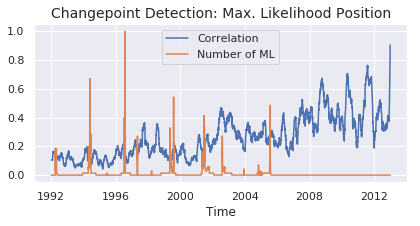

In [7]:

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates, data, label="Correlation")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")
plt.plot(Dates,composite_cp_result/max(composite_cp_result), label="Number of ML")
plt.legend()#loc= "upper right")
plt.tight_layout()

#plt.savefig('composite_cp_result_ws' + str(window_size) + '_Safety'+str(safetymargin)
#			+'_Shift'+str(window_shift) + '.pdf',bb_inches="tight", dpi=200)
plt.show()
plt.close()

In [8]:

date_time_str = '1995-12-15 00:00:00'

date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

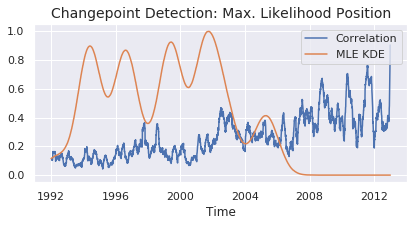

In [9]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")
plt.legend()#loc= "upper right")
plt.tight_layout()
#plt.savefig('composite_cp_result_KDE_ws' + str(window_size) + '_Safety'+str(safetymargin)
#			+'_Shift'+str(window_shift) + '.pdf',bb_inches="tight", dpi=200)
plt.show()
plt.close()

In [10]:
Dates[1000]

Timestamp('1995-12-15 00:00:00')

In [11]:
#  Stepanov's Dates

Stepanovs = list()

date_time_str = '1996-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  #From spring 1996

date_time_str = '2000-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  # until spring 2000

date_time_str = '2003-07-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  # Spring 2000 to the second half of 2003:
 
date_time_str = '2007-10-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj)  #From the second half of 2003 until fall of 2007

date_time_str = '2009-03-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanovs.append(date_time_obj) #From October 2007 until March 2009:

In [12]:
### CAN BE JUSTIFIED VIA EMERGENCE OF STATE 7 INSTEAD OF 6
date_time_str = '2002-07-01 00:00:00'
date_time_obj_maybe = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S') # Spring 2000 to the second half of 2003:

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

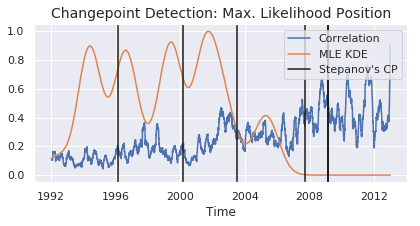

In [13]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanovs:
    plt.axvline(d, c = "k", linestyle = "-")
plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")

    
plt.axvline(date_time_obj, c = "k", linestyle = "--")

plt.legend()#loc= "upper right")
plt.tight_layout()
plt.savefig('Stepanov_Comparison_ws' + str(window_size) + '_Safety'+str(safetymargin)
            +'_Shift'+str(Shift) + '.pdf',bb_inches="tight", dpi=200)


plt.show()
plt.close()

In [14]:
Stepanovs[0]

datetime.datetime(1996, 3, 1, 0, 0)

## Some further stuff

In [15]:

Stepanov2 = list()

date_time_str = '1994-06-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanov2.append(date_time_obj)  # Brief appearance of state 4


date_time_str = '2005-06-01 00:00:00'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
Stepanov2.append(date_time_obj)  # re-emergence of state 5

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

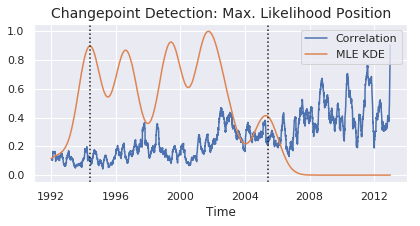

In [16]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanov2:
    plt.axvline(d, c = "k", linestyle = ":")
#plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")

 

plt.legend()#loc= "upper right")
plt.tight_layout()
#plt.savefig('Stepanov_Comparison_ws' + str(window_size) + '_Safety'+str(safetymargin)
#            +'_Shift'+str(Shift) + '.pdf',bb_inches="tight", dpi=200)


plt.show()
plt.close()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

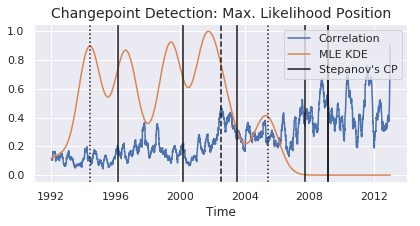

In [17]:
dfML = pd.DataFrame(data = {"Frequency": composite_cp_result})


ML_freq = pd.Series(dfML.index.repeat(dfML["Frequency"]))
kde = stats.gaussian_kde(ML_freq)
Daterange = np.arange(len(Dates))

fig = plt.gcf()
fig.set_size_inches(6, 3.3)
plt.plot(Dates,data, label="Correlation")
plt.plot(Dates, kde(Daterange) / np.max(kde(Daterange)), label="MLE KDE")
plt.title("Changepoint Detection: Max. Likelihood Position", fontsize = 14)
plt.xlabel("Time")


for d in Stepanovs:
    plt.axvline(d, c = "k", linestyle = "-")
plt.axvline(d,c="k", linestyle="-", label="Stepanov's CP")


plt.axvline(date_time_obj_maybe, c = "k", linestyle = "--")

for d in Stepanov2:
    plt.axvline(d, c = "k", linestyle = ":")
    

plt.legend()#loc= "upper right")
plt.tight_layout()
plt.savefig('Stepanov_Comparison_(2)_ws' + str(window_size) + '_Safety'+str(safetymargin)
            +'_Shift'+str(Shift) + '.pdf',bb_inches="tight", dpi=200)


plt.show()
plt.close()